# HDip in Science in Data Analytics for Business (FT) 
## Data Visualization and Machine Learning


#### Fabiane dos Santos Teixeira (2021225)                               
#### Nuno Alfredo Ribeiro Teixeira de Almeida (2021310)            
#### Valesca Soledad Bravo Bravo (2021235)
#### Thiago Medeiros de Souza (2019410)


## Title : <font color='blue'>Discuss the concept and application of Time series analysis using machine learning modelling by providing a real-world data set. What is the purpose of The Augmented Dickey-Fuller test in time series? a) Apply an appropriate ARIMA or Exponential Smoothing model to the chosen data. Check for the model adequacy.b) Make one-step-ahead forecasts of the last 10 observations. Determine the forecast errors.c) Make a time series plot of the data, and further calculate and illustrate the sample autocorrelation and partial autocorrelation (PA). Is there significant autocorrelation in the chosen time series?d) Create a visualisation using Plotly with its functionalities to highlight anomalies/trends/patterns and use the necessary techniques to visualise the density of the data displayed. Briefly explain the behaviour of your data based on your visualisation and use the outcome as a lead to perform a research to complete your explanations. e) Use a set of subplots to show different times of the series. You must justify the library you selected,
reasoning and segmentation you performed in order to show valuable insights about the topic.
</font>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import plotly.express as px
from datetime import timedelta
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
from statsmodels.tsa.arima_model import ARIMA,ARIMAResults
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_log_error
import itertools
from sklearn.model_selection import TimeSeriesSplit
import warnings
warnings.filterwarnings('ignore') # We can suppress the warnings

### I.- Time series analysis

The eurozone is a monetary union of 19 member states of the European Union that have adopted the euro as their primary currency. 

In [2]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
df = pd.read_csv('euro-daily-hist_1999_2022.csv',index_col='Period\\Unit:',parse_dates=['Period\\Unit:'], date_parser=dateparse, dayfirst=True)
pd.set_option('display.max_columns', None)

In [3]:
df.head()

[Australian dollar ] [Bulgarian lev ] [Brazilian real ]  \
Period\Unit:                                                           
2022-04-08                 1.4552           1.9558            5.1583   
2022-04-07                 1.4578           1.9558            5.1460   
2022-04-06                 1.4431           1.9558            5.0996   
2022-04-05                 1.4374           1.9558            5.0384   
2022-04-04                 1.4651           1.9558            5.1162   

             [Canadian dollar ] [Swiss franc ] [Chinese yuan renminbi ]  \
Period\Unit:                                                              
2022-04-08               1.3675         1.0155                   6.9115   
2022-04-07               1.3704         1.0185                   6.9448   
2022-04-06               1.3647         1.0187                   6.9498   
2022-04-05               1.3647         1.0141                   6.9783   
2022-04-04               1.3749         1.0203                   7.0026   

             [Cypriot pound ] [Czech koruna ] [Danish krone ]  \
Period\Unit:                                                    
2022-04-08                NaN          24.479          7.4372   
2022-04-07                NaN          24.512          7.4378   
2022-04-06                NaN          24.441          7.4378   
2022-04-05                NaN          24.338          7.4378   
2022-04-04                NaN          24.320          7.4385   

             [Estonian kroon ] [UK pound sterling ] [Greek drachma ]  \
Period\Unit:                                                           
2022-04-08                 NaN              0.83355              NaN   
2022-04-07                 NaN              0.83450              NaN   
2022-04-06                 NaN              0.83473              NaN   
2022-04-05                 NaN              0.83490              NaN   
2022-04-04                 NaN              0.83890              NaN   

             [Hong Kong dollar ] [Croatian kuna ] [Hungarian forint ]  \
Period\Unit:                                                            
2022-04-08                8.5134           7.5490              375.66   
2022-04-07                8.5554           7.5562              379.26   
2022-04-06                8.5617           7.5470              377.77   
2022-04-05                8.5917           7.5399              370.93   
2022-04-04                8.6226           7.5455              369.15   

             [Indonesian rupiah ] [Israeli shekel ] [Indian rupee ]  \
Period\Unit:                                                          
2022-04-08               15601.96            3.5010         82.3890   
2022-04-07               15692.35            3.5259         82.9510   
2022-04-06               15683.36            3.5199         82.8343   
2022-04-05               15732.77            3.5152         82.6350   
2022-04-04               15783.89            3.5312         83.1180   

              [Iceland krona ] [Japanese yen ] [Korean won ]  \
Period\Unit:                                                   
2022-04-08               139.6          134.87       1333.12   
2022-04-07               141.0          135.32       1330.92   
2022-04-06               141.4          135.30       1330.44   
2022-04-05               141.6          134.76       1330.81   
2022-04-04               141.8          135.08       1338.41   

             [Lithuanian litas ] [Latvian lats ] [Maltese lira ]  \
Period\Unit:                                                       
2022-04-08                   NaN             NaN             NaN   
2022-04-07                   NaN             NaN             NaN   
2022-04-06                   NaN             NaN             NaN   
2022-04-05                   NaN             NaN             NaN   
2022-04-04                   NaN             NaN             NaN   

             [Mexican peso ] [Malaysian ringgit ] [Norwegian krone ]  \
Period\Unit: 

In [4]:
#printing summary of a DataFrame.
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6022 entries, 2022-04-08 to 1999-01-04
Data columns (total 40 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   [Australian dollar ]      6022 non-null   object 
 1   [Bulgarian lev ]          5620 non-null   object 
 2   [Brazilian real ]         5754 non-null   object 
 3   [Canadian dollar ]        6022 non-null   object 
 4   [Swiss franc ]            6022 non-null   object 
 5   [Chinese yuan renminbi ]  5754 non-null   object 
 6   [Cypriot pound ]          2346 non-null   object 
 7   [Czech koruna ]           6022 non-null   object 
 8   [Danish krone ]           6022 non-null   object 
 9   [Estonian kroon ]         3130 non-null   object 
 10  [UK pound sterling ]      6022 non-null   object 
 11  [Greek drachma ]          520 non-null    object 
 12  [Hong Kong dollar ]       6022 non-null   object 
 13  [Croatian kuna ]          5754 non-null   obj

In [6]:
#df.set_index('Period\\Unit:', inplace=True)#set the index
df.index.rename('Date', inplace = True)#rename it
df.index = pd.to_datetime(df.index)#pass it to datatime

In [7]:
#Convert columns data to numeric
cols = list(df)
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')# It will replace all non-numeric values with NaN
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6022 entries, 2022-04-08 to 1999-01-04
Data columns (total 40 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   [Australian dollar ]      5960 non-null   float64
 1   [Bulgarian lev ]          5562 non-null   float64
 2   [Brazilian real ]         5693 non-null   float64
 3   [Canadian dollar ]        5960 non-null   float64
 4   [Swiss franc ]            5960 non-null   float64
 5   [Chinese yuan renminbi ]  5693 non-null   float64
 6   [Cypriot pound ]          2304 non-null   float64
 7   [Czech koruna ]           5960 non-null   float64
 8   [Danish krone ]           5960 non-null   float64
 9   [Estonian kroon ]         3074 non-null   float64
 10  [UK pound sterling ]      5960 non-null   float64
 11  [Greek drachma ]          514 non-null    float64
 12  [Hong Kong dollar ]       5960 non-null   float64
 13  [Croatian kuna ]          5693 non-null   flo

In [8]:
#cleaning
col = str.maketrans('', '', '[]')
df.columns = df.columns.str.translate(col)
df.columns = df.columns.str.strip()
df.tail()

Australian dollar  Bulgarian lev  Brazilian real  Canadian dollar  \
Date                                                                            
1999-01-08             1.8406            NaN             NaN           1.7643   
1999-01-07             1.8474            NaN             NaN           1.7602   
1999-01-06             1.8820            NaN             NaN           1.7711   
1999-01-05             1.8944            NaN             NaN           1.7965   
1999-01-04             1.9100            NaN             NaN           1.8004   

            Swiss franc  Chinese yuan renminbi  Cypriot pound  Czech koruna  \
Date                                                                          
1999-01-08       1.6138                    NaN        0.58187        34.938   
1999-01-07       1.6165                    NaN        0.58187        34.886   
1999-01-06       1.6116                    NaN        0.58200        34.850   
1999-01-05       1.6123                    NaN        0.58230        34.917   
1999-01-04       1.6168                    NaN        0.58231        35.107   

            Danish krone  Estonian kroon  UK pound sterling  Greek drachma  \
Date                                                                         
1999-01-08        7.4433         15.6466            0.70940         324.00   
1999-01-07        7.4431         15.6466            0.70585         324.40   
1999-01-06        7.4452         15.6466            0.70760         324.72   
1999-01-05        7.4495         15.6466            0.71220         324.70   
1999-01-04        7.4501         15.6466            0.71110         327.15   

            Hong Kong dollar  Croatian kuna  Hungarian forint  \
Date                                                            
1999-01-08            9.0302            NaN            250.15   
1999-01-07            9.0131            NaN            250.09   
1999-01-06            9.1010            NaN            250.67   
1999-01-05            9.1341            NaN            250.80   
1999-01-04            9.1332            NaN            251.48   

            Indonesian rupiah  Israeli shekel  Indian rupee  Iceland krona  \
Date                                                                         
1999-01-08            9321.63             NaN           NaN          80.99   
1999-01-07            9218.77             NaN           NaN          81.06   
1999-01-06            9337.68             NaN           NaN          81.54   
1999-01-05            9314.51             NaN           NaN          81.53   
1999-01-04            9433.61             NaN           NaN          81.48   

            Japanese yen  Korean won  Lithuanian litas  Latvian lats  \
Date                                                                   
1999-01-08        130.09     1366.73            4.6643        0.6654   
1999-01-07        129.43     1337.16            4.6548        0.6627   
1999-01-06        131.42     1359.54            4.6994        0.6649   
1999-01-05        130.96     1373.01            4.7174        0.6657   
1999-01-04        133.73     1398.59            4.7170        0.6668   

            Maltese lira  Mexican peso  Malaysian ringgit  Norwegian krone  \
Date                                                                         
1999-01-08        0.4419       11.4414             4.4295           8.5900   
1999-01-07        0.4413       11.5511             4.4203           8.6295   
1999-01-06        0.4420       11.4705             4.4637           8.7335   
1999-01-05        0.4432       11.5960             4.4805           8.7745   
1999-01-04        0.4432       11.6446             4.4798           8.8550   

            New Zealand dollar  Philippine peso  Polish zloty  Romanian leu  \
Date                                                                          
1999-01-08              2.1557           44.295        4.0363        1.3143   
1999-01-07              2.1531           44.436    

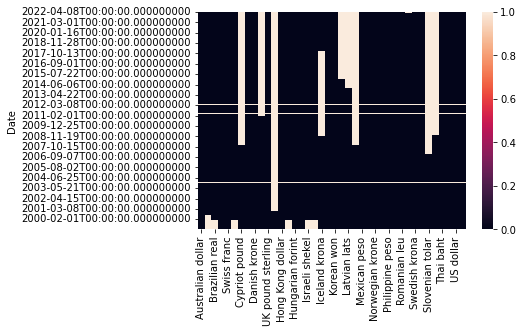

In [9]:
# Visualization of the missing values.
sns.heatmap(df.isnull());

In [10]:
#selecting null
null = df.index[df.isnull().all(1)]
print(null)
print('Number of NaN rows: {}'.format(len(null)))

DatetimeIndex(['2012-05-01', '2012-04-09', '2012-04-06', '2011-12-26',
               '2011-04-25', '2011-04-22', '2010-04-05', '2010-04-02',
               '2010-01-01', '2009-12-25', '2009-05-01', '2009-04-13',
               '2009-04-10', '2009-01-01', '2008-12-26', '2008-12-25',
               '2008-05-01', '2008-03-24', '2008-03-21', '2008-01-01',
               '2007-12-26', '2007-12-25', '2007-05-01', '2007-04-09',
               '2007-04-06', '2007-01-01', '2006-12-26', '2006-12-25',
               '2006-05-01', '2006-04-17', '2006-04-14', '2005-12-26',
               '2005-03-28', '2005-03-25', '2004-04-12', '2004-04-09',
               '2004-01-01', '2003-12-26', '2003-12-25', '2003-05-01',
               '2003-04-21', '2003-04-18', '2003-01-01', '2002-12-26',
               '2002-12-25', '2002-05-01', '2002-04-01', '2002-03-29',
               '2002-01-01', '2001-12-31', '2001-12-26', '2001-12-25',
               '2001-05-01', '2001-04-16', '2001-04-13', '2001-01-01',
      

In [11]:
df = df.drop(null)##dropping null values

In [12]:
#We will work with US Dollar because it is the biggest world currency 
Euro= df[['US dollar']]
#filling the missing values for Saturday and Sunday
Euro = Euro.resample('1D').ffill()
Euro= Euro.resample('1D').bfill()

# ADD Frecuency information
#Euro.index = pd.DatetimeIndex(Euro.index).to_period('D')
Euro.head(7)

US dollar
Date                 
1999-01-04     1.1789
1999-01-05     1.1790
1999-01-06     1.1743
1999-01-07     1.1632
1999-01-08     1.1659
1999-01-09     1.1659
1999-01-10     1.1659

In [12]:
pd.plotting.register_matplotlib_converters()#modifies and adds custom converters for time
#Euro.index = Euro.index.to_timestamp()#set index again

### Time Series Decomposition

Most of Time series models assume that the data is stationary. This Process consist of separating time series data into its core components;
+ Level: The average value in the series.
+ Trend: The increasing or decreasing value in the series.
+ Seasonality: The repeating short-term cycle in the series.
+ Noise: The random variation in the series.


<a href=" https://machinelearningmastery.com/decompose-time-series-data-trend-seasonality/">J. Brownlee, 2017</a>

In [13]:
# graphs to show seasonal_decompose
def ETS_Decomposition (timeseries):
    """Plot to descompose the time series in years with a 
    multiplicative model: y(t) = Level * Trend * Seasonality * Noise"""
    
    decomposition = sm.tsa.seasonal_decompose(timeseries, model='add', freq= 365)# year show off seasonality better
                                                                               #30 days  
    
    fig = decomposition.plot()
    fig.set_size_inches(17,8)
    plt.show()
   

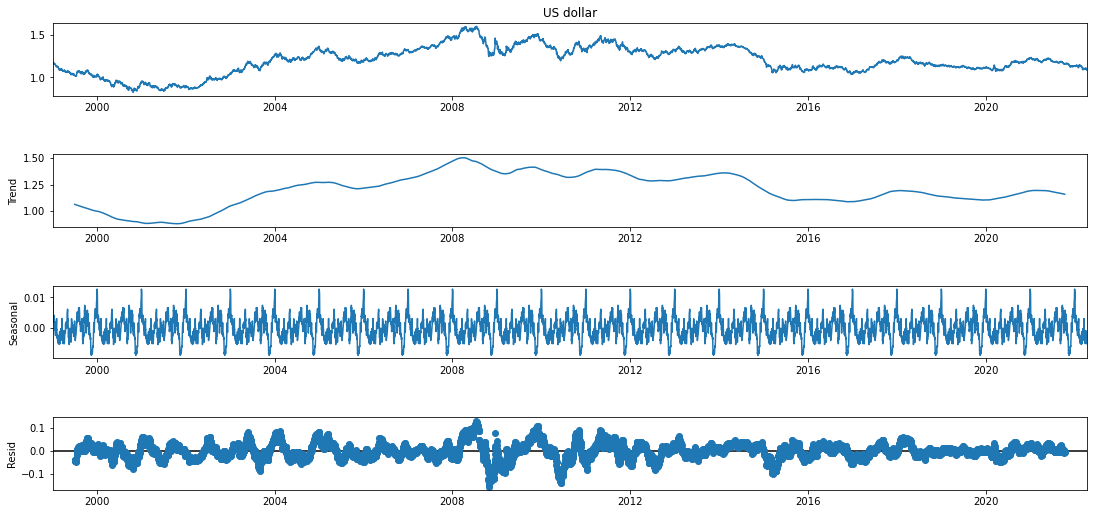

In [14]:
ETS_Decomposition (Euro['US dollar'])

### Stationality 

#### Augmented Dickey–Fuller test

Augmented Dickey–Fuller test is one of the most commonly statistical test used to check whether a given Time series is stationary or not.  

In [15]:
def ADFuller(timeseries):
    """
    Function applies the Augmented Dickey–Fuller test to the time series,
    and check the level of confidence at 99%, 95% and 90%
    
    """
    result = adfuller(timeseries, autolag='AIC')
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t{}: {} - The data is {} stationary with {}% confidence'.format(key, value, 'not' if value < result[0] else '', 100-int(key[:-1])))

In [16]:
ADFuller(Euro['US dollar'])

ADF Statistic: -1.757653
p-value: 0.401679
Critical Values:
	1%: -3.4311219237655033 - The data is not stationary with 99% confidence
	5%: -2.8618811376213795 - The data is not stationary with 95% confidence
	10%: -2.566951582662797 - The data is not stationary with 90% confidence


#### Statistical methodology plotted

Stationarity has the property that the mean, standard deviation and autocorrelation structure do not change over time, they are constants. <a href="https://www.baeldung.com/cs/acf-pacf-plots-arma-modeling">(E. Zvornicanin, 2021)</a>

In [17]:
### Plot for testing Stationarity with mean and standard deviation
def plot_stationarity(timeseries, title):
    '''
    
    Plot that gives a visual representation of the dataset to define its stationarity. 
    If the time series plus its mean and Standard deviation stand together it is stationary,
    if not is non-stationary.
 
    '''
    #Determing rolling statistics
    mean = pd.Series(timeseries).rolling(30).mean()#rolling a month
    std = pd.Series(timeseries).rolling(30).std()#rolling a month
    
    #setting the figure
    fig, ax = plt.subplots(figsize=(16, 4))
    #ploting
    ax.plot(timeseries, label= title)
    ax.plot(mean, label='rolling mean');
    ax.plot(std, label='rolling std');
    ax.legend()

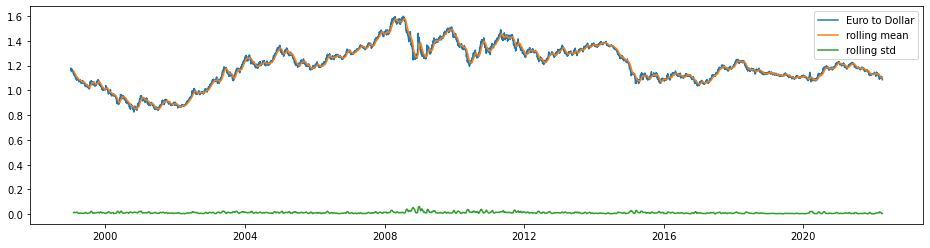

In [18]:
plot_stationarity(Euro['US dollar'], 'Euro to Dollar')

Making the dataset stationary by Detrending with rolling mean of 30 days 

ADF Statistic: -19.038067
p-value: 0.000000
Critical Values:
	1%: -3.431122744725021 - The data is  stationary with 99% confidence
	5%: -2.8618815003822777 - The data is  stationary with 95% confidence
	10%: -2.5669517757633757 - The data is  stationary with 90% confidence


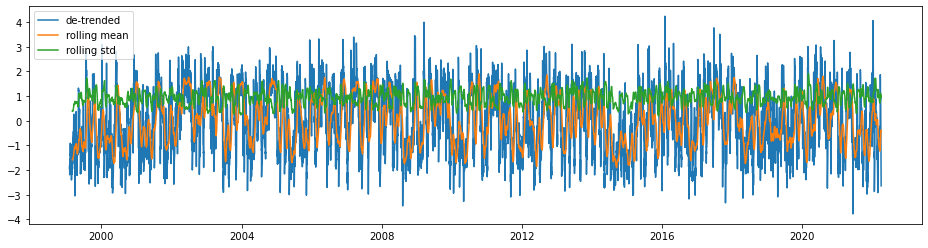

In [19]:
pd.options.mode.chained_assignment = None #to avoid SettingWithCopyWarning in Pandas
Euro['Detrend']=  (Euro['US dollar'] - Euro['US dollar'].rolling(30).mean())/Euro['US dollar'].rolling(30).std().dropna()
plot_stationarity(Euro['Detrend'],'de-trended')
ADFuller(Euro['Detrend'].dropna(inplace=False))

### Determining Parameters

#### ACF and PACF

+ Auto-Correlation Function: it describes how well the present value of the series is related with its past values.
+ Partial Auto-Correlation Function: It finds correlation of the residuals.
<a href="https://towardsdatascience.com/significance-of-acf-and-pacf-plots-in-time-series-analysis-2fa11a5d10a8">(J. Salvi. 2019)</a>

In [20]:
def plot_ACF_PACF(timeseries, title):
    '''
    An ACF measures the average correlation between data points in a time series
    and previous values of the series measured for different lag lengths.
    A PACF measures each partial correlation controls for any correlation between observations of a shorter lag length.
    
    '''
    #setting the figure
    plt.figure(figsize=(12,8))
    layout = (2, 2)
    ax_xt = plt.subplot2grid(layout, (0, 0), colspan = 2)
    ax_acf= plt.subplot2grid(layout, (1, 0))
    ax_pacf = plt.subplot2grid(layout, (1, 1))
    
    #selecting visual parameters
    timeseries.plot(ax = ax_xt)
    ax_xt.set_title(title)
    ax_xt.lines[0].set_color('blue')
    ax_xt.tick_params(axis='x', colors='green')  # 'both' refers to minor and major axes
    plot_acf(timeseries[1:], lags = 60, ax = ax_acf) # first value of diff is NaN
    ax_acf.lines[0].set_color('green')
    ax_acf.lines[1].set_color('green')
    plot_pacf(timeseries[1:], lags = 60, ax = ax_pacf) # first value of diff is NaN
    ax_pacf.lines[0].set_color('green')
    ax_pacf.lines[1].set_color('green')
    plt.tight_layout()

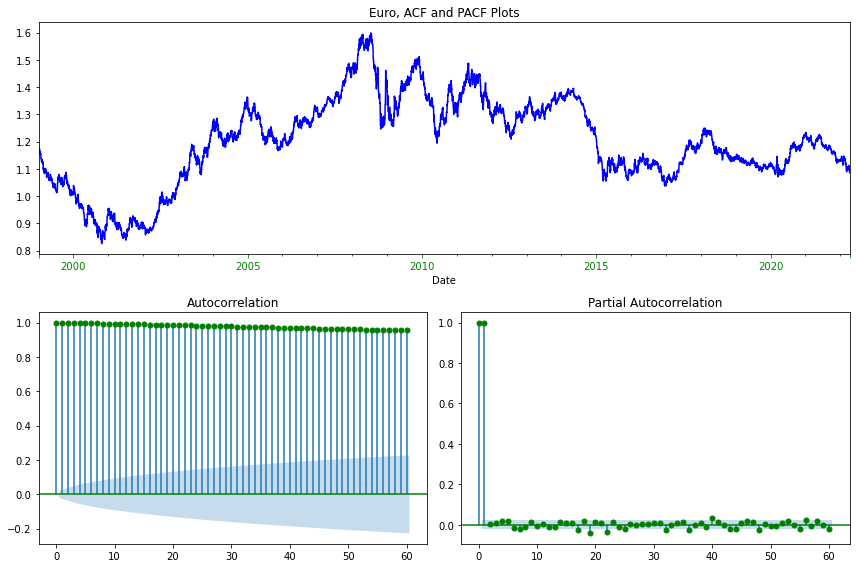

In [21]:
plot_ACF_PACF(Euro['US dollar'], 'Euro, ACF and PACF Plots')

#### Calculating the lower AIC


The Akaike information criterion (AIC) is a metric that is used to compare the fit of different regression models.

It is calculated as:

AIC = 2K – 2ln(L)

- K: The number of model parameters.
- ln(L): The log-likelihood of the model. 

This tells us how likely the model is, given the data. <a href="https://www.baeldung.com/cs/acf-pacf-plots-arma-modeling">(E. Zvornicanin, 2021)</a>

In [22]:
# evaluate combinations of p, d and q values for an ARIMA model
aicVal=[]
p_values = range(0, 3)#AR
d_values = range(0, 3)
q_values = range(0, 3)#MA
for p in p_values:
    for d in d_values:
        for q in q_values:
            try:
                arima_obj = ARIMA(Euro['US dollar'].tolist(),  order = (p,d,q))
                arima_obj_fit=arima_obj.fit()
                aicVal.append([p, d, q, arima_obj_fit.aic])
            except:
                continue
print(aicVal)            

[[0, 0, 0, -7189.3674128385355], [0, 0, 1, -18518.349600526068], [0, 0, 2, -27874.482941004477], [0, 1, 0, -62745.545008633984], [0, 1, 1, -62743.57176305221], [0, 1, 2, -62742.222009573976], [0, 2, 0, -56835.04791983244], [0, 2, 1, -62726.25323986925], [0, 2, 2, -62724.2492532462], [1, 0, 0, -62748.25733907329], [1, 0, 1, -62746.274397208894], [1, 0, 2, -62744.871126198064], [1, 1, 0, -62743.571311187436], [1, 2, 0, -59238.0844950613], [1, 2, 1, -62698.2868902635], [1, 2, 2, -62710.278617259835], [2, 0, 0, -62746.27411614639], [2, 0, 1, -62744.539891729844], [2, 0, 2, -62743.650642548295], [2, 1, 0, -62742.19470980963], [2, 2, 0, -60210.19710326869], [2, 2, 1, -62656.125646062465], [2, 2, 2, -62672.00932641568]]


<div class="alert alert-info">For model comparison, the model with the <strong>lowest AIC score is preferred.</strong> The absolute values of the AIC scores do not matter.  These scores can be<strong> negative or positive.</strong>
    - <TT> <a href="https://stats.stackexchange.com/questions/84076/negative-values-for-aic-in-general-mixed-model">(S. Hohenstein, 2014)</a></TT>  
    </div>

#### Autoarima

Returns best ARIMA model according to either AIC, AICc or BIC value. The function conducts a search over possible model within the order constraints provided. <a href="https://www.rdocumentation.org/packages/forecast/versions/8.16/topics/auto.arima">(rdocumentation.org, n.d.)</a>


In [23]:
import pmdarima as pmd

def arimamodel(timeseriesarray):
    autoarima_model = pmd.auto_arima(timeseriesarray, 
                              start_p=0, 
                              start_q=0,
                              test="adf",
                              trace=True)
    autoarima_model.plot_diagnostics(figsize=(10, 6))
    return autoarima_model

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-62745.545, Time=0.93 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-62743.571, Time=1.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-62743.571, Time=0.81 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-62747.517, Time=0.46 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-62741.544, Time=2.02 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 5.282 seconds


ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

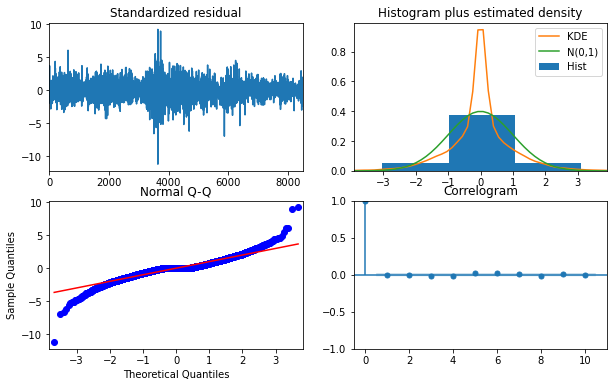

In [24]:
 arimamodel(Euro['US dollar'])

<div class="alert alert-info"><strong>Lowest Akaike Information Criterion Results by:</strong> 
    - <TT> -> Loops [order=(1, 0, 0)] </TT>  
    - <TT> -> Autorima [order=(0, 1, 0)]</TT>  
    </div>

### Arima

AutoRegressive Integrated Moving average. It predicts future values based on past values.
+ Autoregression (AR): refers to a model that shows a changing variable that regresses on its own lagged,
+ Integrated (I): represents the differencing of raw observations to allow for the time series to become stationary 
+ Moving average (MA):  incorporates the dependency between an observation and a residual error from a moving average model applied to lagged observations.

 Parameters 
+ p: the number of lag observations in the model; also known as the lag order.
+ d: the number of times that the raw observations are differenced; also known as the degree of differencing.
+ q: the size of the moving average window; also known as the order of the moving average.
<a href="https://www.investopedia.com/terms/a/autoregressive-integrated-moving-average-arima.asp#:~:text=An%20autoregressive%20integrated%20moving%20average%2C%20or%20ARIMA%2C%20is%20a%20statistical,values%20based%20on%20past%20values.">(A. Hayes, 2021)</a>

In [25]:
# Divide into train and validation 
train = Euro[:int(0.85 * (len(Euro)))]
test  = Euro[int(0.85 * (len(Euro))):]
train.shape, test.shape

((7221, 2), (1275, 2))

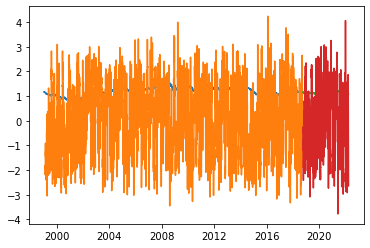

In [26]:
plt.plot(train.index, train.values)
plt.plot(test.index, test.values)
plt.show()#split distribution

In [27]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7221 entries, 1999-01-04 to 2018-10-11
Freq: D
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   US dollar  7221 non-null   float64
 1   Detrend    7192 non-null   float64
dtypes: float64(2)
memory usage: 169.2 KB


In [28]:
n=int(len(Euro)* 0.9)#90% of the dtaset
train = list(Euro[:n]['US dollar'])
test  = list(Euro[n:]['US dollar'])
model_pred=[]
history = [x for x in train]
n_test_Obs =len(test)
# walk-forward validation
for i in range(n_test_Obs):
    model= sm.tsa.arima.ARIMA(history, order=(1,0,0)).fit()#setting and fitting the model
    output=model.forecast()#forecasting
    yhat = output[0]#the first day prediction
    model_pred.append(yhat)#add the prediction to the model
    obs_test=test[i]#itering over the test dataset
    diffval = np.append([0], model.resid + model.fittedvalues)
    history.append(obs_test)#pass the historial to the training dataset 

In [29]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 8495
Model:                 ARIMA(1, 0, 0)   Log Likelihood               31373.307
Date:                Sun, 29 May 2022   AIC                         -62740.614
Time:                        11:24:04   BIC                         -62719.473
Sample:                             0   HQIC                        -62733.399
                               - 8495                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1980      0.097     12.352      0.000       1.008       1.388
ar.L1          0.9993      0.000   2655.946      0.000       0.999       1.000
sigma2      3.625e-05    2.6e-07    139.359      0.000    3.57e-05    3.68e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):             19045.45
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):               0.66   Skew:                            -0.12
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

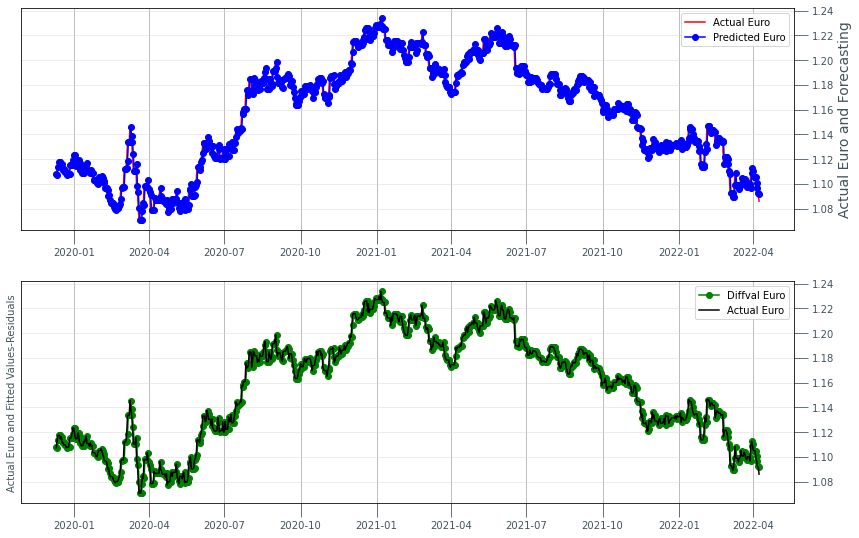

In [59]:
#setting the figure.
fig, axes = plt.subplots(2, 1,
                gridspec_kw={'height_ratios': [3, 3]}, figsize=(12, 8))

fig.tight_layout(pad=3)
date_range1= Euro[:-n].index
date_range2= Euro[n:].index

#selecting colors
colors = {'red': '#ff207c', 'grey': '#42535b', 'blue': '#207cff', 'orange': '#ffa320', 'green': '#00ec8b'}
config_ticks = {'size': 14, 'color': colors['grey'], 'labelcolor': colors['grey']}
config_title = {'size': 18, 'color': colors['grey'], 'ha': 'left', 'va': 'baseline'}
plt.rc('figure', figsize=(15, 10))

#Plot 1= Historical price
plot_pred = axes[0]
plot_pred.grid(True)
plot_pred.plot(date_range2, test,color= 'red', label ='Actual Euro')
plot_pred.plot(date_range2, model_pred,color= 'blue', marker= 'o', label ='Predicted Euro')
plot_pred.legend()

#Plot 1=selecting visual parameters 
plot_pred.yaxis.tick_right()
plot_pred.tick_params(axis='both', **config_ticks)
plot_pred.set_ylabel('Actual Euro and Forecasting', fontsize=14)
plot_pred.yaxis.set_label_position("right")
plot_pred.yaxis.label.set_color(colors['grey'])
plot_pred.grid(axis='y', color='gainsboro', linestyle='-', linewidth=0.5)
plot_pred.set_axisbelow(True)

#Plot 2= Historical diff
plot_diff = axes[1]
plot_diff.grid(True)
plot_diff.plot(date_range2, diffval[n:],color= 'green', marker= 'o', label ='Diffval Euro')
plot_diff.plot(date_range2, test,color= 'black', label ='Actual Euro')

#Plot 2=selecting visual parameters 
plot_diff.yaxis.tick_right()
plot_diff.tick_params(axis='both', **config_ticks)
plot_diff.yaxis.set_label_position("left")
plot_diff.yaxis.label.set_color(colors['grey'])
plot_diff.grid(axis='y', color='gainsboro', linestyle='-', linewidth=0.5)
plot_diff.set_axisbelow(True)
 
plt.ylabel('Actual Euro and Fitted Values-Residuals')
plt.legend()
plt.show()




* fitted values: Each observation in a time series can be forecast using all previous observations and almost always involve one-step forecasts  <b> yt|t−1</b>
 
* Residuals: Are equal to the difference between the observations and the corresponding fitted values,<b>t=yt−^yt</b>. 

Residuals are useful in checking whether a model has adequately captured the information in the data.<a href=" https://otexts.com/fpp2/regarima.html">(R.Hyndman and G. Athanasopoulos,n.d.)</a>


In [53]:
# Create a dataframe to store r2 score
R_arima = pd.DataFrame({'r2_score': r2_score(test, model_pred)}, index = [0])

# Add columns in the dataframe 'evaluation_results'
R_arima['Model'] = 'ARIMA Prediction'
R_arima.set_index(['Model'], inplace=True)
R_arima['mean_absolute_error'] = mean_absolute_error(test, model_pred)
R_arima['mean_squared_error'] = mean_squared_error(test, model_pred)
R_arima['root_mean_squared_error'] = np.sqrt(mean_squared_error(test, model_pred))
R_arima['mean_absolute_percentage_error'] = np.mean(np.abs(np.array(model_pred) - np.array(test))
                                                               /np.abs(test))*100 

# Create a dataframe to store r2 score
R_arimaD = pd.DataFrame({'r2_score': r2_score(test, diffval[n:])}, index = [0])

# Add columns in the dataframe 'evaluation_results'
R_arimaD['Model'] = 'Fitted Values-Residuals'
R_arimaD.set_index(['Model'], inplace=True)
R_arimaD['mean_absolute_error'] = mean_absolute_error(test, diffval[n:])
R_arimaD['mean_squared_error'] = mean_squared_error(test, diffval[n:])
R_arimaD['root_mean_squared_error'] = np.sqrt(mean_squared_error(test, diffval[n:]))
R_arimaD['mean_absolute_percentage_error'] = np.mean(np.abs(np.array(diffval[n:]) - np.array(test))
                                                               /np.abs(test))*100 
result= pd.concat([R_arima,R_arimaD])


# Display the results
result

r2_score  mean_absolute_error  mean_squared_error  \
Model                                                                        
ARIMA Prediction         0.990847             0.002612            0.000017   
Fitted Values-Residuals  0.990844             0.002601            0.000017   

                         root_mean_squared_error  \
Model                                              
ARIMA Prediction                        0.004104   
Fitted Values-Residuals                 0.004105   

                         mean_absolute_percentage_error  
Model                                                    
ARIMA Prediction                               0.227072  
Fitted Values-Residuals                        0.226099

In [33]:
#creating a range of data
Index_10_Step_foward= pd.date_range(start='2022-04-08', freq='D', periods=10).rename('Date')

#puting this range datatime
dates = Index_10_Step_foward.to_pydatetime()
#print(dates[0])
#print(dates[0].strftime('%Y-%m-%d'))
dates=pd.to_datetime(dates)
dates

DatetimeIndex(['2022-04-08', '2022-04-09', '2022-04-10', '2022-04-11',
               '2022-04-12', '2022-04-13', '2022-04-14', '2022-04-15',
               '2022-04-16', '2022-04-17'],
              dtype='datetime64[ns]', freq=None)

In [34]:
#Forescasting 10 Days
pred= model.predict(start= len(Euro), end= len(Euro)+9, tipe= 'levels').tolist()

# Residues and fitted values are added and stored into dataframe
diffval = np.append([0], model.resid + model.fittedvalues)
#Create a dataframe to storage it
Step_foward = pd.DataFrame(pred)
Euro['diffval']= diffval

#adding the index the range time
Step_foward.index=Index_10_Step_foward
Step_foward.rename(columns = {0:'US dollar'}, inplace = True)
#Join the data set to plot them
Step_foward_10= pd.concat([Euro,Step_foward])
Step_foward_10.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8506 entries, 1999-01-04 to 2022-04-17
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   US dollar  8506 non-null   float64
 1   Detrend    8467 non-null   float64
 2   diffval    8496 non-null   float64
dtypes: float64(3)
memory usage: 265.8 KB


In [35]:
Step_foward_10.tail()

US dollar  Detrend  diffval
Date                                   
2022-04-13   1.092118      NaN      NaN
2022-04-14   1.092191      NaN      NaN
2022-04-15   1.092265      NaN      NaN
2022-04-16   1.092339      NaN      NaN
2022-04-17   1.092412      NaN      NaN

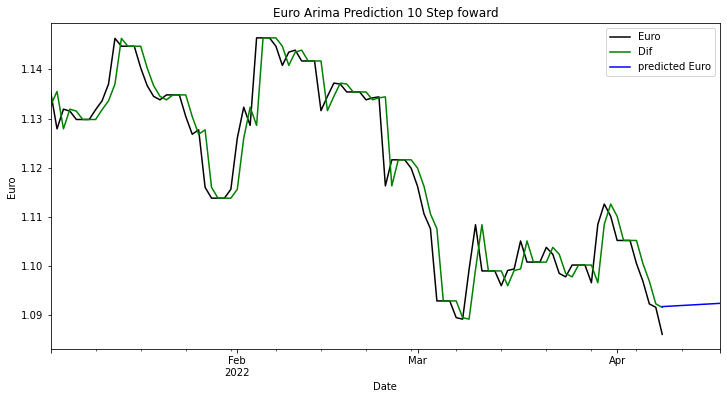

In [36]:
#Join the data set to plot them
Step_foward_10= pd.concat([Euro,Step_foward])
plt.figure(figsize=(12,6))
plt.grid(True)
date_range= Step_foward_10.index
Euro['US dollar'][8400:].plot(color= 'black',label= 'Euro')
Euro['diffval'][8400:].plot(color= 'green',label= 'Dif')
Step_foward['US dollar'].plot(color= 'blue',label= 'predicted Euro')
#Step_foward_10['US dollar'].plot(color= 'blue',label= 'predicted Euro')
plt.title('Euro Arima Prediction 10 Step foward')
plt.xlabel('Date')
plt.ylabel('Euro')
plt.legend()
plt.show()

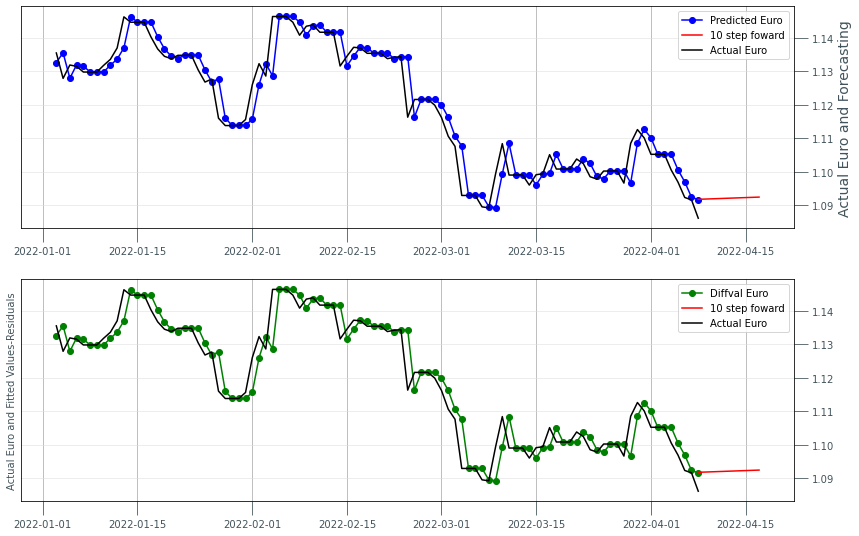

In [74]:
### setting the figure.
fig, axes = plt.subplots(2, 1,
                gridspec_kw={'height_ratios': [2, 2]}, figsize=(12, 8))


fig.tight_layout(pad=3)
date_range1= Euro[:-n].index
date_range2= Euro[n:].index

#selecting colors
colors = {'red': '#ff207c', 'grey': '#42535b', 'blue': '#207cff', 'orange': '#ffa320', 'green': '#00ec8b'}
config_ticks = {'size': 14, 'color': colors['grey'], 'labelcolor': colors['grey']}
config_title = {'size': 18, 'color': colors['grey'], 'ha': 'left', 'va': 'baseline'}
plt.rc('figure', figsize=(15, 10))

#Plot 1= Historical price
plot_pred = axes[0]
plot_pred.grid(True)
plot_pred.plot(Euro['US dollar'][8400:].index, model_pred[754:], color= 'blue', marker= 'o', label ='Predicted Euro')
plot_pred.plot(Step_foward['US dollar'],color= 'red', label ='10 step foward')
plot_pred.plot(Euro['US dollar'][8400:],color= 'black', label ='Actual Euro')

plot_pred.legend()


#Plot 1=selecting visual parameters 
plot_pred.yaxis.tick_right()
plot_pred.tick_params(axis='both', **config_ticks)
plot_pred.set_ylabel('Actual Euro and Forecasting', fontsize=14)
plot_pred.yaxis.set_label_position("right")
plot_pred.yaxis.label.set_color(colors['grey'])
plot_pred.grid(axis='y', color='gainsboro', linestyle='-', linewidth=0.5)
plot_pred.set_axisbelow(True)

#Plot 2= Historical diff
plot_diff = axes[1]
plot_diff.grid(True)
plot_diff.plot(Euro['diffval'][8400:],color= 'green', marker= 'o', label ='Diffval Euro')
plot_diff.plot(Step_foward['US dollar'],color= 'red', label ='10 step foward')
plot_diff.plot(Euro['US dollar'][8400:],color= 'black', label ='Actual Euro')


#Plot 2=selecting visual parameters 
plot_diff.yaxis.tick_right()
plot_diff.tick_params(axis='both', **config_ticks)
plot_diff.yaxis.set_label_position("left")
plot_diff.yaxis.label.set_color(colors['grey'])
plot_diff.grid(axis='y', color='gainsboro', linestyle='-', linewidth=0.5)
plot_diff.set_axisbelow(True)


plt.ylabel('Actual Euro and Fitted Values-Residuals')
plt.legend()
plt.show()

The function Arima() will fit a regression model with ARIMA errors. The order argument specifies the order of the ARIMA error model. If differencing is specified, then the differencing is applied to all variables in the regression model before the model is estimated. <a href=" https://otexts.com/fpp2/regarima.html">(R.Hyndman and G. Athanasopoulos,n.d.)</a>
<a href="https://timeseriesreasoning.com/contents/regression-with-arima-errors-model/">(S. Date,n.d.)</a>
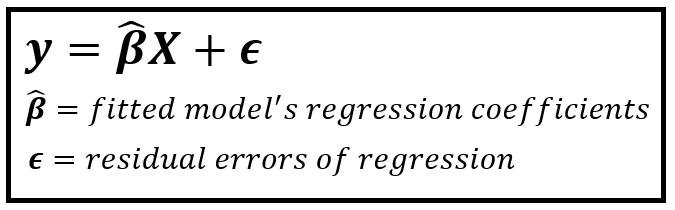


In [75]:
Euro1999_2002 = Euro['1999-01-04':'2001-12-31']#The euro was used only by financial markets and certain businesses
Euro2002_2004 = Euro['2002-01-01':'2004-05-31']#Euro notes and coins are introduced and withdrawal of the Belgian franc begins.
Euro2004_2007 = Euro['2004-06-01':'2007-12-31']#ten new countries join the European Union
Euro2007 = Euro['2007-01-01':'2007-12-31']#Bulgaria and Romania join the European Union
Euro2008 = Euro['2008-01-01':'2008-12-31']#Cyprus and Malta join  the European Union
Euro2009_2010 = Euro['2009-01-01':'2010-12-31']#Slovakia joins the euro area.
Euro2011_2013 = Euro['2011-01-01':'2013-12-31']#Estonia joins the euro area.
Euro2014_2020 = Euro['2014-01-01':'2022-01-30']#Latvia  joins the euro area.
Euro2020= Euro['2022-01-31':'2022-04-08']#Brexit  

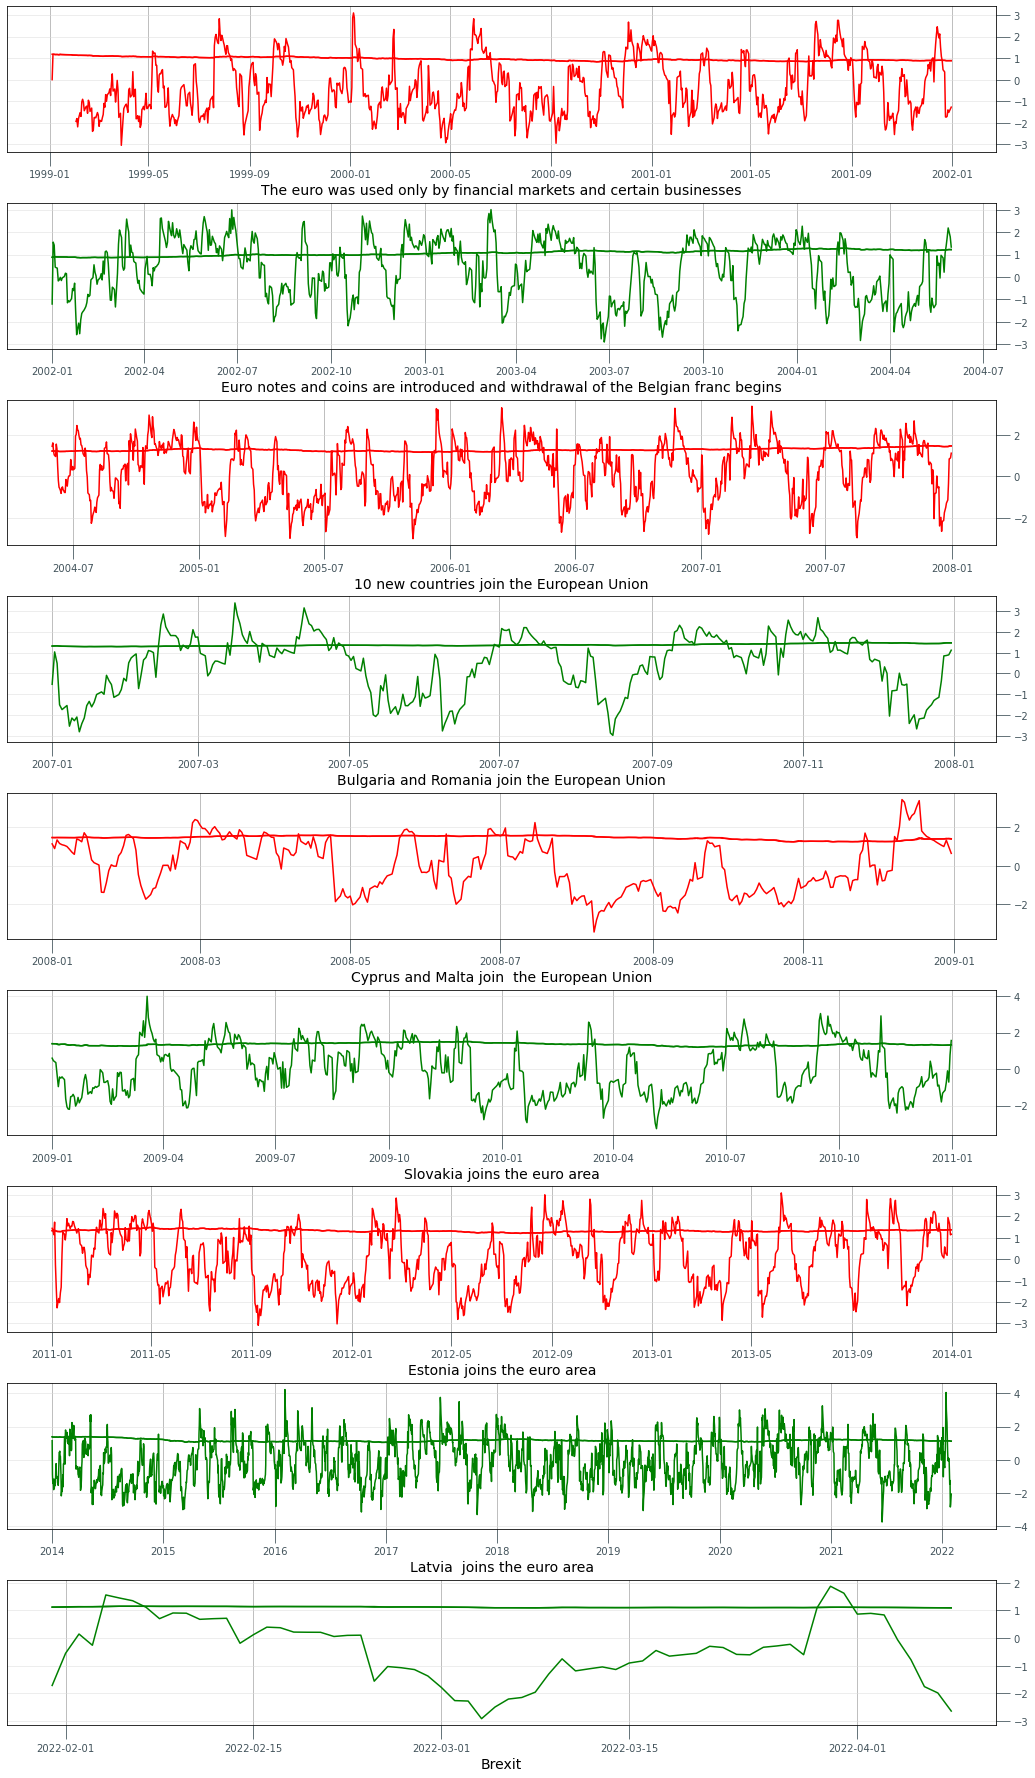

In [120]:
#setting the figure.
fig, axes = plt.subplots(9, 1, gridspec_kw={'height_ratios': [1,1,1,1,1,1,1,1,1], 'width_ratios':[1]},
                         figsize=(15,25), sharex=False)


fig.tight_layout(pad=3)
date_range1= Euro[:-n].index
date_range2= Euro[n:].index

#selecting colors
colors = {'red': '#ff207c', 'grey': '#42535b', 'blue': '#207cff', 'orange': '#ffa320', 'green': '#00ec8b'}
config_ticks = {'size': 14, 'color': colors['grey'], 'labelcolor': colors['grey']}
config_title = {'size': 18, 'color': colors['grey'], 'ha': 'left', 'va': 'baseline'}
plt.rc('figure', figsize=(15, 10))

#Plot 1= Euro1999_2002 
plot_1 = axes[0]
plot_1.grid(True)
plot_1.plot(Euro1999_2002,color= 'red', label ='Actual Euro')
#Plot 1=selecting visual parameters 
plot_1.yaxis.tick_right()
plot_1.tick_params(axis='both', **config_ticks)
plot_1.set_xlabel('The euro was used only by financial markets and certain businesses', fontsize=14)
plot_1.yaxis.set_label_position("right")
plot_1.yaxis.label.set_color(colors['grey'])
plot_1.grid(axis='y', color='gainsboro', linestyle='-', linewidth=0.5)
plot_1.set_axisbelow(True)

#Plot 2= Euro2002_2004
plot_2 = axes[1]
plot_2.grid(True)
plot_2.plot(Euro2002_2004,color= 'green', label ='Diffval Euro')
#Plot 2=selecting visual parameters 
plot_2.yaxis.tick_right()
plot_2.set_xlabel('Euro notes and coins are introduced and withdrawal of the Belgian franc begins', fontsize=14)
plot_2.tick_params(axis='both', **config_ticks)
plot_2.yaxis.set_label_position("left")
plot_2.yaxis.label.set_color(colors['grey'])
plot_2.grid(axis='y', color='gainsboro', linestyle='-', linewidth=0.5)
plot_2.set_axisbelow(True)
 
#Plot 3= Euro2004_2007 
plot_3 = axes[2]
plot_3.grid(True)
plot_3.plot(Euro2004_2007 ,color= 'red', label ='Actual Euro')
#Plot 1=selecting visual parameters 
plot_3.yaxis.tick_right()
plot_3.tick_params(axis='both', **config_ticks)
plot_3.set_xlabel('10 new countries join the European Union', fontsize=14)
plot_3.yaxis.set_label_position("right")
plot_3.yaxis.label.set_color(colors['grey'])
plot_3.grid(axis='y', color='gainsboro', linestyle='-', linewidth=0.5)
plot_3.set_axisbelow(True)

#Plot 4= Euro2007
plot_4 = axes[3]
plot_4.grid(True)
plot_4.plot(Euro2007,color= 'green', label ='Diffval Euro')
#Plot 4=selecting visual parameters 
plot_4.yaxis.tick_right()
plot_4.set_xlabel('Bulgaria and Romania join the European Union', fontsize=14)
plot_4.tick_params(axis='both', **config_ticks)
plot_4.yaxis.set_label_position("left")
plot_4.yaxis.label.set_color(colors['grey'])
plot_4.grid(axis='y', color='gainsboro', linestyle='-', linewidth=0.5)
plot_4.set_axisbelow(True)

#Plot 5= Euro2008
plot_5 = axes[4]
plot_5.grid(True)
plot_5.plot(Euro2008,color= 'red', label ='Actual Euro')
#Plot 1=selecting visual parameters 
plot_5.yaxis.tick_right()
plot_5.tick_params(axis='both', **config_ticks)
plot_5.set_xlabel('Cyprus and Malta join  the European Union', fontsize=14)
plot_5.yaxis.set_label_position("right")
plot_5.yaxis.label.set_color(colors['grey'])
plot_5.grid(axis='y', color='gainsboro', linestyle='-', linewidth=0.5)
plot_5.set_axisbelow(True)

#Plot 6= Euro2002_2004
plot_6 = axes[5]
plot_6.grid(True)
plot_6.plot(Euro2009_2010,color= 'green', label ='Diffval Euro')
#Plot 6=selecting visual parameters 
plot_6.yaxis.tick_right()
plot_6.set_xlabel('Slovakia joins the euro area', fontsize=14)
plot_6.tick_params(axis='both', **config_ticks)
plot_6.yaxis.set_label_position("left")
plot_6.yaxis.label.set_color(colors['grey'])
plot_6.grid(axis='y', color='gainsboro', linestyle='-', linewidth=0.5)
plot_6.set_axisbelow(True)
 
#Plot 7= Euro2011_2013
plot_7 = axes[6]
plot_7.grid(True)
plot_7.plot(Euro2011_2013 ,color= 'red', label ='Actual Euro')
#Plot 7=selecting visual parameters 
plot_7.yaxis.tick_right()
plot_7.tick_params(axis='both', **config_ticks)
plot_7.set_xlabel('Estonia joins the euro area', fontsize=14)
plot_7.yaxis.set_label_position("right")
plot_7.yaxis.label.set_color(colors['grey'])
plot_7.grid(axis='y', color='gainsboro', linestyle='-', linewidth=0.5)
plot_7.set_axisbelow(True)

#Plot 8= Euro2014_2020
plot_8 = axes[7]
plot_8.grid(True)
plot_8.plot(Euro2014_2020,color= 'green', label ='Diffval Euro')
#Plot 8=selecting visual parameters 
plot_8.yaxis.tick_right()
plot_8.set_xlabel('Latvia  joins the euro area', fontsize=14)
plot_8.tick_params(axis='both', **config_ticks)
plot_8.yaxis.set_label_position("left")
plot_8.yaxis.label.set_color(colors['grey'])
plot_8.grid(axis='y', color='gainsboro', linestyle='-', linewidth=0.5)
plot_8.set_axisbelow(True)

#Plot 9= Euro2007
plot_9 = axes[8]
plot_9.grid(True)
plot_9.plot(Euro2020,color= 'green', label ='Diffval Euro')
#Plot 9=selecting visual parameters 
plot_9.yaxis.tick_right()
plot_9.set_xlabel('Brexit', fontsize=14)
plot_9.tick_params(axis='both', **config_ticks)
plot_9.yaxis.set_label_position("left")
plot_9.yaxis.label.set_color(colors['grey'])
plot_9.grid(axis='y', color='gainsboro', linestyle='-', linewidth=0.5)
plot_9.set_axisbelow(True)
 

plt.show()

### Data Vizualization 

#### Anomalies / Trends / Pattern

In [13]:
#We will work with US Dollar because it is the biggest world currency 
Euro2 = df[['US dollar']]
#filling the missing values for Saturday and Sunday
Euro = Euro.resample('1D').ffill()
Euro= Euro.resample('1D').bfill()

# ADD Frecuency information
#Euro.index = pd.DatetimeIndex(Euro.index).to_period('D')
Euro2.head(7)

US dollar
Date                 
2022-04-08     1.0861
2022-04-07     1.0916
2022-04-06     1.0923
2022-04-05     1.0969
2022-04-04     1.1005
2022-04-01     1.1052
2022-03-31     1.1101

In [14]:
Euro_viz = Euro2.reset_index(level=0)

In [15]:
dateTime=pd.to_datetime(Euro_viz["Date"])
Euro_viz['Day']=dateTime.dt.day_name()
Euro_viz['Month']=dateTime.dt.month_name()
Euro_viz['Year']=dateTime.dt.year
Euro_viz.head(5)

Date  US dollar        Day  Month  Year
0 2022-04-08     1.0861     Friday  April  2022
1 2022-04-07     1.0916   Thursday  April  2022
2 2022-04-06     1.0923  Wednesday  April  2022
3 2022-04-05     1.0969    Tuesday  April  2022
4 2022-04-04     1.1005     Monday  April  2022

In [17]:
fig = px.density_contour(Euro_viz, x="Date", y="US dollar", marginal_x="histogram", marginal_y="histogram")
fig.show()

In [18]:
anaYear = [2020]
NewAnalyses = Euro_viz[(Euro_viz['Year'].isin(anaYear))]

In [19]:
fig = px.line(NewAnalyses, x= "Date", y="US dollar", title= "2020 PATTERN")
fig.show()